📘 Netflix Movie Data Analysis

Author: Ochieng Clive

Description: Exploratory Data Analysis (EDA) on Netflix movies and TV shows

Dataset Source: [Netflix Titles on Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)


📦 1. Import Libraries


In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

📂 2. Load the Dataset


In [33]:
df = pd.read_csv("../data/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



🧼 3. Basic Cleaning


In [36]:
df.info()
df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

df.isnull().sum()

#missing directors and cast with 'Not specified'
df['director'].fillna('Not specified', inplace=True)
df['cast'].fillna('Not specified', inplace=True)

#missing country values with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

#(only applies to movies)
df.dropna(subset=['duration'], inplace=True)

#(essential fields)
df.dropna(subset=['title', 'type'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [45]:
# Only for Movies
df_movies = df[df['type'] == 'Movie'].copy()

df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)

# Preview cleaned movie data
df_movies[['title', 'duration', 'duration_minutes']].head()


,title,duration,duration_minutes
0,Dick Johnson Is Dead,90 min,90.0
6,My Little Pony: A New Generation,91 min,91.0
7,Sankofa,125 min,125.0
9,The Starling,104 min,104.0
12,Je Suis Karl,127 min,127.0


🔍 4. Exploratory Data Analysis (EDA)

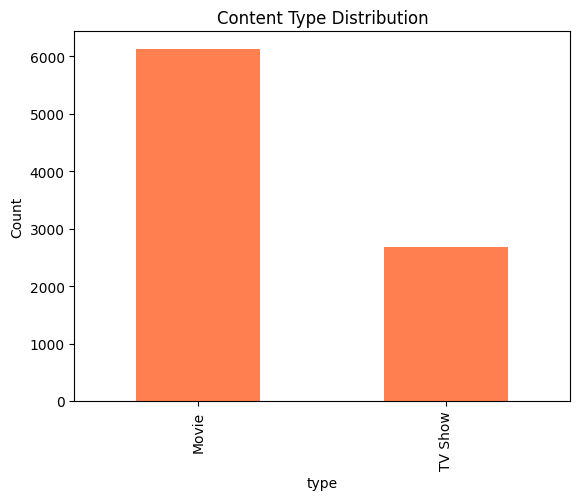

In [32]:

#Content Type Distribution (Movies vs TV Shows)
df['type'].value_counts().plot(kind='bar', color='coral')
plt.title("Content Type Distribution")
plt.ylabel("Count")
plt.show()

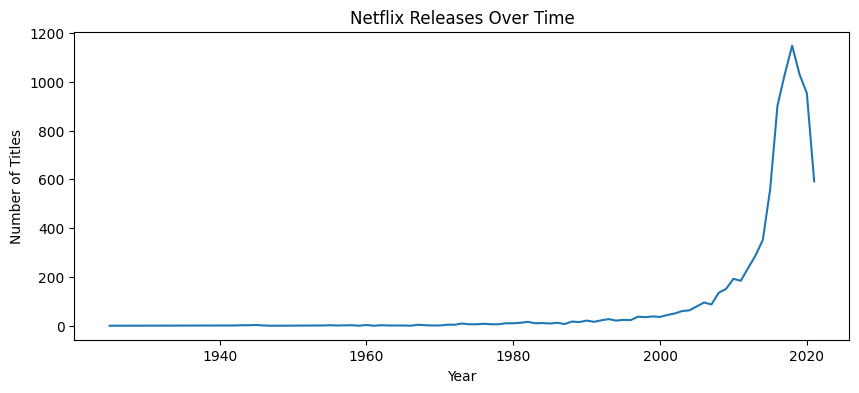

In [27]:
#Number of Releases Over the Years
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,4))
plt.title("Netflix Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

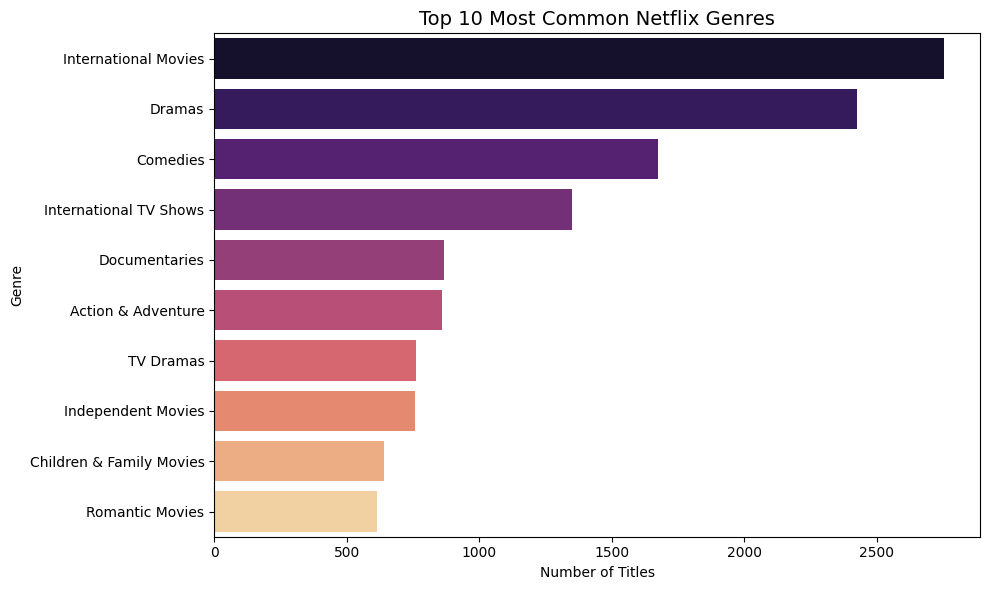

In [44]:
#Most Common Genres
all_genres = df['listed_in'].dropna().str.split(', ').explode()

#frequency of each genre
genre_counts = all_genres.value_counts().head(10)


plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')

plt.title('Top 10 Most Common Netflix Genres', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


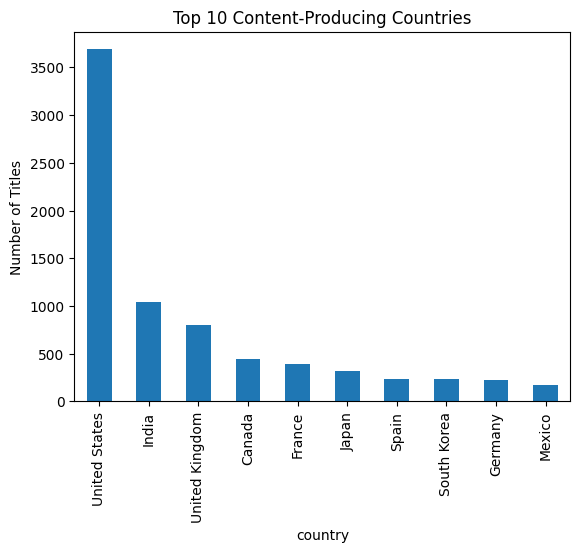

In [14]:
#Top Countries by Content Production
df['country'].dropna().str.split(', ').explode().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Content-Producing Countries")
plt.ylabel("Number of Titles")
plt.show()

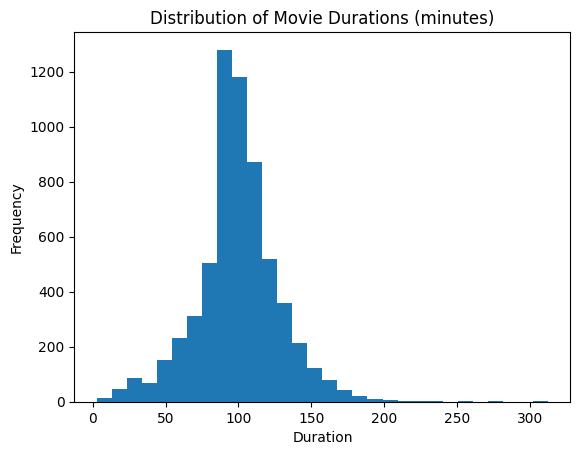

In [39]:
#Distribution of Movie Duration
df_movies = df[df['type'] == 'Movie']
df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)
df_movies['duration_minutes'].plot(kind='hist', bins=30)
plt.title("Distribution of Movie Durations (minutes)")
plt.xlabel("Duration")
plt.show()


🧠 5. Key Insights & Summary

-There’s a clear upward trend in the number of titles released each year, with a significant spike starting around 2015, reflecting Netflix's global expansion and investment in original content.

-Approximately 70% of all titles are movies, while the rest are TV shows. This reflects Netflix’s emphasis on single-sitting entertainment, though TV content is steadily growing.

-“Drama” appears most frequently across titles, followed by “Comedy” and “Documentaries.” This shows that Netflix’s core offerings are narrative-driven and appeal to wide audiences.

-The majority of titles originate from the USA, followed by India, which has seen a sharp rise in content contributions, especially in the last few years.

-Common maturity ratings like TV-MA and TV-14 dominate the platform, indicating a focus on teen and adult audiences.


THE END